# About the notebook

- Kuei-Yueh Ko
- Presentation Date: 01/18/2019

This notebook is the homework 01 of the module 01 in Duke BIOS824 Course.

In [1]:
import numpy as np
from   numpy import genfromtxt
from   scipy import signal
import matplotlib.pyplot  as plt
import matplotlib.patches as patches
import os

In [2]:
%matplotlib inline

my own helper function

In [3]:
head = lambda x, n = 6: x[:n]
tail = lambda x, n = 6: x[-n:]

# Import image

In [4]:
!ls -1 /home/clint/GitRepo/Duke_BIOS824_CaseStudies/figures

cocktail_160803.jpg
GE2013_GrahamWright_KASH5_SCP3.jpg


read in image

In [5]:
img_dir   = "/home/clint/GitRepo/Duke_BIOS824_CaseStudies/figures"
img_ctail = plt.imread(os.path.join(img_dir, "cocktail_160803.jpg"))

find the dimension of the image

In [6]:
img_ctail.shape

(1622, 1216, 3)

visualize the image

(-0.5, 1215.5, 1621.5, -0.5)

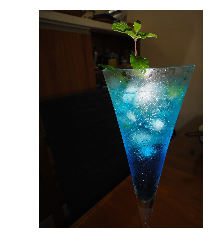

In [7]:
plt.imshow(img_ctail)
plt.axis('off')

# Turn it into grayscale and display the image

visualize different channels of the image

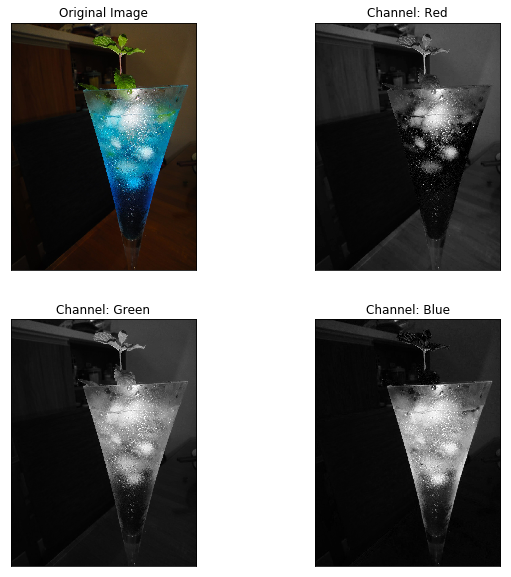

In [8]:
### set subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize = (10, 10))
plt.setp(axes, xticks=[], yticks=[])

### plot each channels
img = img_ctail
axes[0, 0].imshow(img)
axes[0, 1].imshow(img[:, :, 0], cmap = "gray")
axes[1, 0].imshow(img[:, :, 1], cmap = "gray")
axes[1, 1].imshow(img[:, :, 2], cmap = "gray")

### set titles of subplots
axes[0, 0].set_title("Original Image")
axes[0, 1].set_title("Channel: Red")
axes[1, 0].set_title("Channel: Green")
axes[1, 1].set_title("Channel: Blue")

pass

convert the image into gray scale and normalize. here I tried different normalization
- standardization
- min-max normalization

In [9]:
### convert the gray scale
img = img_ctail
img = np.sum(img, axis = 2)

### standardization for normalization
img_gray_std = (img - np.mean(img)) / np.std(img)

### min-max normalization
new_min = -1
new_max =  1
img = (img - np.min(img)) / (np.max(img) - np.min(img)) * (new_max - new_min) + new_min
img_gray_mm = img

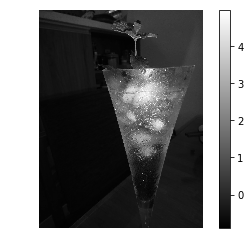

In [10]:
plt.imshow(img_gray_std, cmap = "gray")
plt.colorbar()
plt.axis('off')
pass

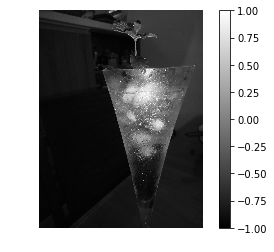

In [11]:
plt.imshow(img_gray_mm, cmap = "gray")
plt.colorbar()
plt.axis('off')
pass

# Apply linear filter on an image

**Before applying linear filter on my own image, I would like to apply the filter on simple images to make sure the results of my code would look reasonable. Here, I decided to use MNIST dataset since the patterns of number could be easily detected and the image size is small. Using MNIST data would be easy for my to debug my code at the first place.**

Download a MNIST dataset

```
!wget https://pjreddie.com/media/files/mnist_train.csv -O ./data/mnist_train.csv
!wget https://pjreddie.com/media/files/mnist_test.csv -O ./data/mnist_test.csv
```

Read in the MNIST dataset

In [12]:
#mnist_train = genfromtxt('./data/mnist_train.csv', delimiter = ',')
mnist_test  = genfromtxt('./data/mnist_test.csv',  delimiter = ',')

check the dimension

In [13]:
mnist_test.shape

(10000, 785)

split into labels (column 0) and features (all other columns)

In [14]:
mnist_test_label   = mnist_test[:, 0]
mnist_test_feature = mnist_test[:, 1:]

In [15]:
head(mnist_test_label)

array([7., 2., 1., 0., 4., 1.])

In [16]:
head(mnist_test_feature)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

define helper function for linear filter

In [17]:
def iterate_image_block(img, block_func, block_shape):
    """iterate through all the block, apply a function on the block"""
    ### initialization
    nr, nc = img.shape   # image shape
    br, bc = block_shape # block shape
    
    ### loop over each block
    res = np.empty((nr - (br-1), nc - (bc-1))) # loop intialization
    for idx_row in range(res.shape[0]):
        for idx_col in range(res.shape[1]):
            block = img[idx_row:(idx_row + br), idx_col:(idx_col + bc)]
            res[idx_row, idx_col] = block_func(block)
            
    return res

define the function for median filter

In [18]:
def median_filter(img, block_shape):
    """function for median filter"""
    ### initialization
    res = iterate_image_block(img, np.median, block_shape)
    return res

define the function for cross-correlation

In [19]:
def cross_correlation(img, myfilter):
    """function for cross correlation"""
    
    ### define block operation
    def block_func(block):
        """block func: inner product of image block and filter"""
        num = np.sum(block * myfilter)
        return num
    
    ### initialization
    res = iterate_image_block(img, block_func, myfilter.shape)
    return res

Set filters for edge detection

In [20]:
myfilter_hline = np.array([
    [ 1,  1,  1],
    [ 0,  0,  0],
    [-1, -1, -1]])

myfilter_vline = np.array([
    [ 1,  0, -1],
    [ 1,  0, -1],
    [ 1,  0, -1]])

apply linear filter on some MNIST images

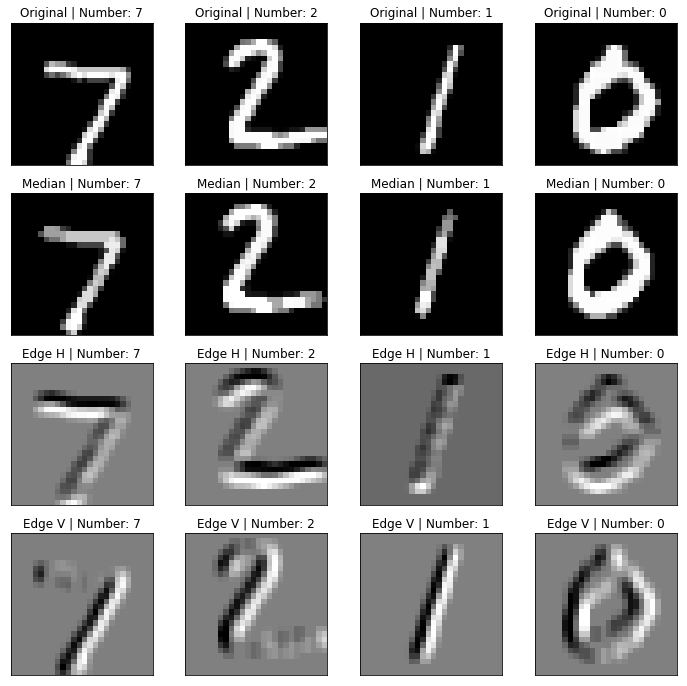

In [21]:
### set subplots
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey=True, figsize = (12, 12))
plt.setp(axes, xticks=[], yticks=[])
axes = axes.ravel()

### apply different linear filter on images
for idx in range(4):
    # initialization
    lab = mnist_test_label[idx]
    img = mnist_test_feature[idx].reshape(28, 28)
    
    ### original image
    ax  = axes[idx + 4 * 0]
    ax.imshow(img, cmap = "gray")
    ax.set_title("Original | Number: " + str(int(lab)))
    
    ### median filter
    res = median_filter(img, (3, 3))
    ax  = axes[idx + 4 * 1]
    ax.imshow(res, cmap = "gray")
    ax.set_title("Median | Number: " + str(int(lab)))
    
    ### edge detection: horizontal line
    myfilter = myfilter_hline
    res = cross_correlation(img, myfilter)
    ax  = axes[idx + 4 * 2]
    ax.imshow(res, cmap = "gray")
    ax.set_title("Edge H | Number: " + str(int(lab)))
    
    # edge detection: vertical lin
    myfilter = myfilter_vline
    res = cross_correlation(img, myfilter)
    ax  = axes[idx + 4 * 3]
    ax.imshow(res, cmap = "gray")
    ax.set_title("Edge V | Number: " + str(int(lab)))
    
pass

# Apply linear filter on my targeted image

apply median filter and edge detection on images

In [22]:
### target image
img = img_gray_std

### median filter
res_median = median_filter(img, (3, 3))

### edge detection: horizontal line
myfilter  = myfilter_hline
res_hline = cross_correlation(img, myfilter)

### edge detection: vertical line
myfilter  = myfilter_vline
res_vline = cross_correlation(img, myfilter)

visualize the results

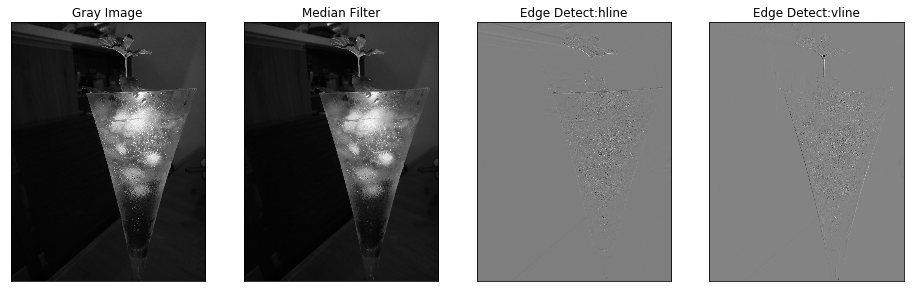

In [23]:
### set subplots
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize = (16, 16))
plt.setp(axes, xticks=[], yticks=[])

### original image
ax  = axes[0]
ax.imshow(img, cmap = "gray")
ax.set_title("Gray Image")
    
### median filter
ax  = axes[1]
ax.imshow(res_median, cmap = "gray")
ax.set_title("Median Filter")
    
### edge detection: horizontal line
ax  = axes[2]
ax.imshow(res_hline, cmap = "gray")
ax.set_title("Edge Detect:hline")
    
### edge detection: vertical line
ax  = axes[3]
ax.imshow(res_vline, cmap = "gray")
ax.set_title("Edge Detect:vline")
    
pass

# Apply custom filter on my targeted image

set up and display the filter

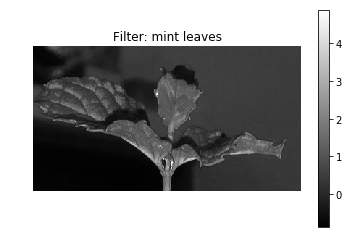

In [24]:
img = img_gray_std[50:250, 530:900]
plt.imshow(img, cmap = "gray")
plt.title("Filter: mint leaves")
plt.colorbar()
plt.axis('off')
pass

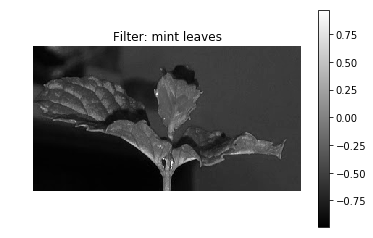

In [25]:
img = img_gray_mm[50:250, 530:900]
plt.imshow(img, cmap = "gray")
plt.title("Filter: mint leaves")
plt.colorbar()
plt.axis('off')
pass

Apply custom filter for cross-correlation on target image

In [26]:
### standardization
img            = img_gray_std
myfilter       = img_gray_std[50:250, 530:900]
res_custom_std = cross_correlation(img, myfilter)

### min-max normalization
img            = img_gray_mm
myfilter       = img_gray_mm[50:250, 530:900]
res_custom_mm  = cross_correlation(img, myfilter)

visualize the results

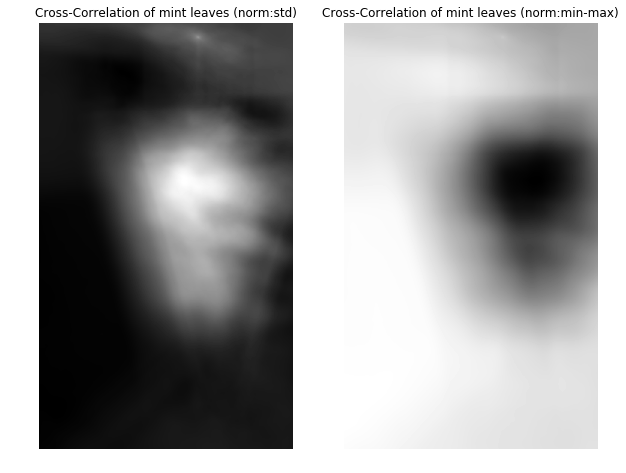

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10, 15))
ax = axes[0]
ax.imshow(res_custom_std, cmap = "gray")
ax.set_title("Cross-Correlation of mint leaves (norm:std)")
ax.axis('off')

ax = axes[1]
ax.imshow(res_custom_mm, cmap = "gray")
ax.set_title("Cross-Correlation of mint leaves (norm:min-max)")
ax.axis('off')
pass

From the results, we could see the method of normalization would affect the results of cross correlation. Below the image of standardization was plotted and the positions of higher signal in cross-correlation result were indicated.

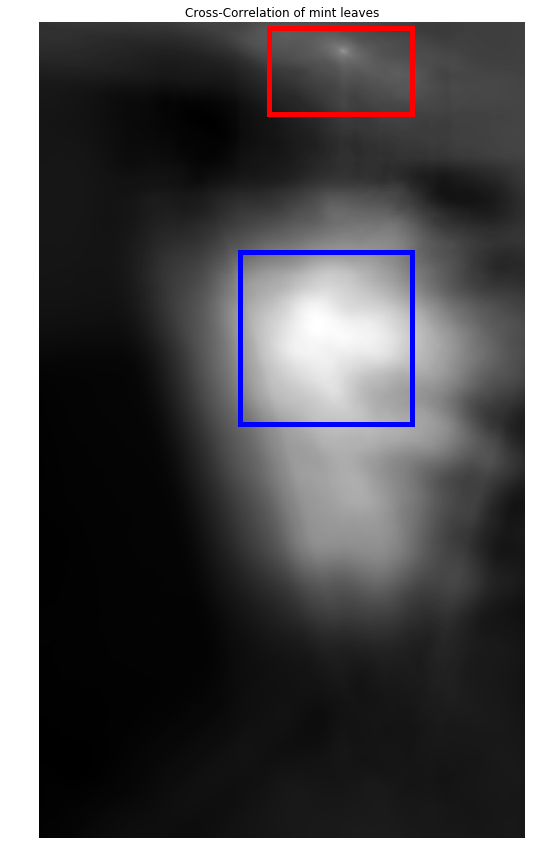

In [28]:
rect1 = patches.Rectangle((400, 10), 250, 150, linewidth=5, edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((350, 400), 300, 300, linewidth=5, edgecolor='b',facecolor='none')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (20, 15))
ax.imshow(res_custom_std, cmap = "gray")
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.set_title("Cross-Correlation of mint leaves")
ax.axis('off')
pass

# Try to solve the problem (increase the specificity of pattern detection)

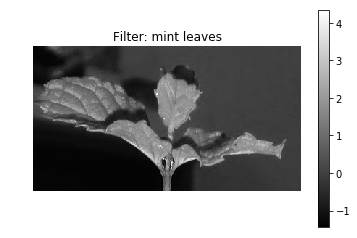

In [29]:
### get the green channel
img = img_ctail[50:250, 530:900, 1]

### min-max normalization of the filter
#new_min = -1
#new_max =  1
#img = (img - np.min(img)) / (np.max(img) - np.min(img)) * (new_max - new_min) + new_min

### standardization
img = (img - np.mean(img)) / np.std(img)

### visualize
myfilter = img
plt.imshow(myfilter, cmap = "gray")
plt.title("Filter: mint leaves")
plt.colorbar()
plt.axis('off')
pass

test if the constrast could further be emphasized by removing the background

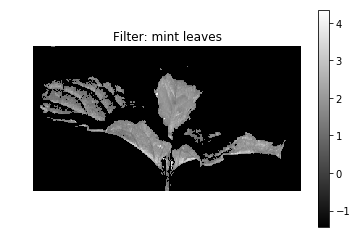

In [30]:
### remove background noise
img[img < 1] = np.min(img)

### visualize
myfilter = img
plt.imshow(myfilter, cmap = "gray")
plt.title("Filter: mint leaves")
plt.colorbar()
plt.axis('off')
pass

perform linear filter again using the processed filter

In [31]:
img            = img_gray_std
res_custom_try = cross_correlation(img, myfilter)

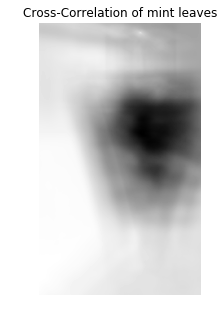

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 5))
ax.imshow(res_custom_try, cmap = "gray")
ax.set_title("Cross-Correlation of mint leaves")
ax.axis('off')
pass

Detect where was the highest value (blue rectangle)

In [33]:
np.where(res_custom_try == np.max(res_custom_try))

(array([1316]), array([7]))

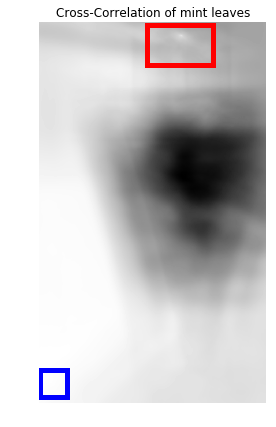

In [34]:
### patches Rectangle position (col, row)
rect1 = patches.Rectangle((400, 10), 250, 150, linewidth=5, edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((3, 1300), 100, 100, linewidth=5, edgecolor='b',facecolor='none')

### visualize
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (10, 7))
ax.imshow(res_custom_try, cmap = "gray")
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.set_title("Cross-Correlation of mint leaves")
ax.axis('off')
pass

# Comment from the Professor

Min-Max normalization often scale it into 0-1 or 0-255, instead of making values become negative.  
But in fact, you can do whatever you want.